# Capstone Two - Adidas Sales Forecasting
## 3. Exploratory Data Analysis

In this part of the project, we'll focus on gaining insights and understanding about the data. Features will be investigated using either visualization tools or statistics models. The goal is to have a better understanding of the core characteristics of the data and identify statistical relationship strengths that could be used to develop hypotheses for further analysis.

## 3.1 Sourcing & Loading
### 3.1.1 Import relevant libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1.2 Import & review data

In [2]:
df = pd.read_csv("df.csv", index_col=0)
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


## 3.2 Data Exploration
### 3.2.1 Overview

First of all, let's take a bird's eye view of Adidas' sales data.

In [3]:
# Calculate total sales, total operating profit and total operating margin.
total_sales = df['Total Sales'].sum()
total_op_profit = df['Operating Profit'].sum()
total_op_margin = total_op_profit/total_sales

print('Total Sales: ', round(total_sales),
     '\nTotal Operating Profit: ', round(total_op_profit),
     '\nTotal Operating Margin: ', round(total_op_margin,2))

Total Sales:  899902125 
Total Operating Profit:  332134761 
Total Operating Margin:  0.37


Next, let's take a look at the total sales over time to see if there's any trend.

In [4]:
# Group total sales by date.
sales_by_time = pd.DataFrame()
sales_by_time['Total Sales'] = df.groupby(df['Invoice Date'])['Total Sales'].sum()
sales_by_time = sales_by_time.reset_index()
sales_by_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Invoice Date  724 non-null    object 
 1   Total Sales   724 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.4+ KB


In [5]:
# Add a new column "Year" & another one for "Year_Month".
sales_by_time['Year'] = sales_by_time['Invoice Date'].str[:4]
sales_by_time['Year_Month'] = sales_by_time['Invoice Date'].str[:7]
sales_by_time.head()

,Invoice Date,Total Sales,Year,Year_Month
0,2020-01-01,845141.0,2020,2020-01
1,2020-01-02,689410.0,2020,2020-01
2,2020-01-03,632573.0,2020,2020-01
3,2020-01-04,615080.0,2020,2020-01
4,2020-01-05,707829.0,2020,2020-01


In [6]:
sales_by_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Invoice Date  724 non-null    object 
 1   Total Sales   724 non-null    float64
 2   Year          724 non-null    object 
 3   Year_Month    724 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.8+ KB


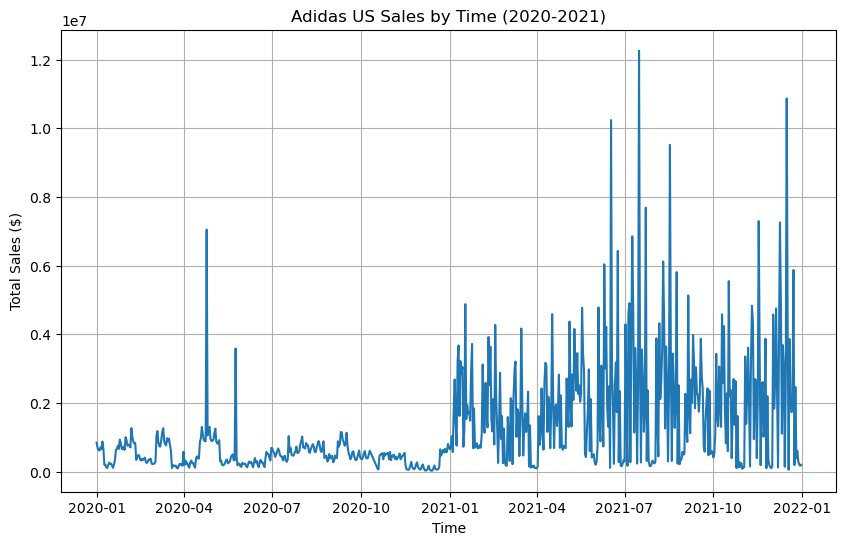

In [7]:
# Change the date type of "Invoice Date" to time-series.
sales_by_time['Invoice Date'] = pd.to_datetime(sales_by_time['Invoice Date'])

# Plot the total sales chart by time.
plt.figure(figsize=(10, 6))
plt.plot(sales_by_time['Invoice Date'], sales_by_time['Total Sales'])
plt.xlabel('Time')
plt.ylabel('Total Sales ($)')
plt.title('Adidas US Sales by Time (2020-2021)')
plt.grid(True)
plt.show()

Based upon the above chart, there seems to be an upward trend in the total sales volume from 2020 to 2021. While there are many bad days in 2021 when the daily sales volume is comparable to 2020, there are more spikes in daily sales volumes in 2021. However, it's not visually clear as to how big the upward trend is. Therefore, we'll plot the same chart again, but by month this time.

In [8]:
# Group total sales by "Year_Month".
sales_by_month = pd.DataFrame()
sales_by_month['Total Sales'] = sales_by_time.groupby(['Year_Month'])['Total Sales'].sum()
sales_by_month = sales_by_month.reset_index()

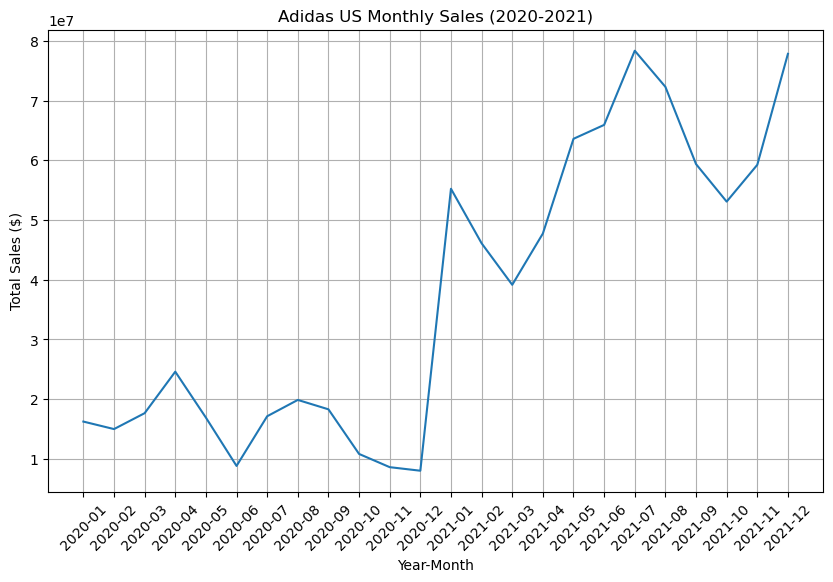

In [9]:
# Plot the total sales chart by month.
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month['Year_Month'], sales_by_month['Total Sales'])
plt.xlabel('Year-Month')
plt.ylabel('Total Sales ($)')
plt.title('Adidas US Monthly Sales (2020-2021)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The monthly sales chart provides a much better view of the sales trend over the two years.  There's a big jump in monthly sales volume in January 2021.  That upward trend kept its momentum through 2021 despite some natural temporary dips.

### 3.2.2 Data Distribution

Now let's take a look at the distribution of numeric features such as Price per Unit, Units Sold, Total Sales, Operating Profit and Operating Margin.

In [10]:
# Define a function called PDB to plot the distribution and boxplot of specified columns.

def PDB(column):
    fig, axs = plt.subplots(ncols=2, figsize=(8, 3))
    axs[0].hist(df[column], bins=10, alpha=0.7, edgecolor='black')
    axs[0].set_xlabel(column)
    axs[0].set_ylabel('COUNT')
    axs[0].set_title(f'Histogram: {column}')
    axs[1].boxplot(df[column])
    axs[1].set_xlabel(column)
    axs[1].set_title(f'Boxplot: {column}')
    
    plt.tight_layout()
    plt.show()

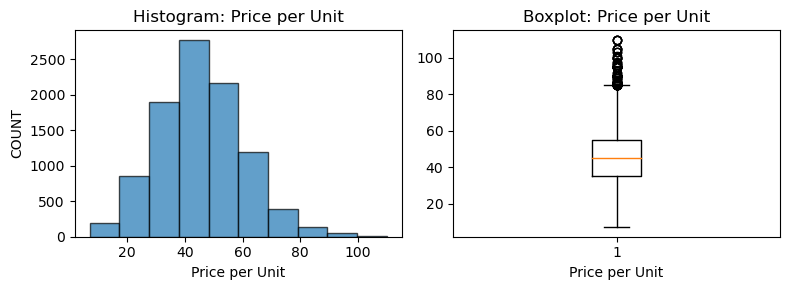

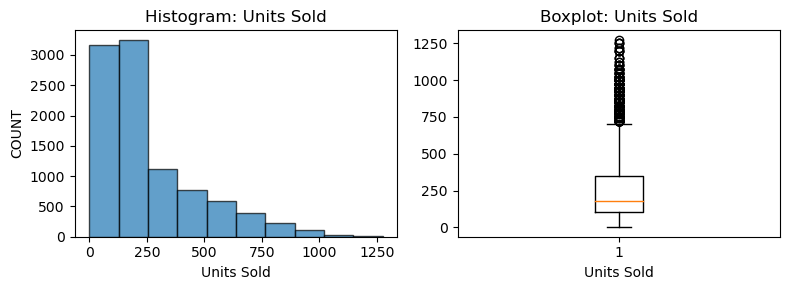

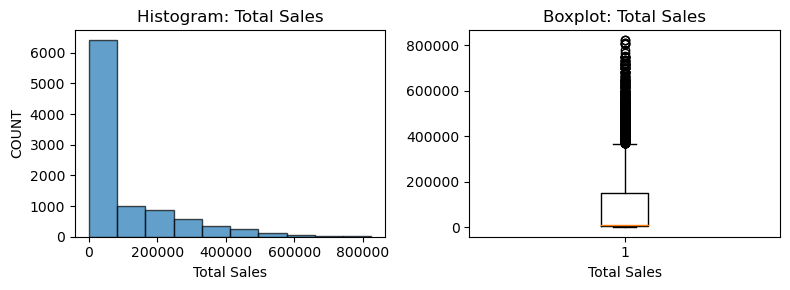

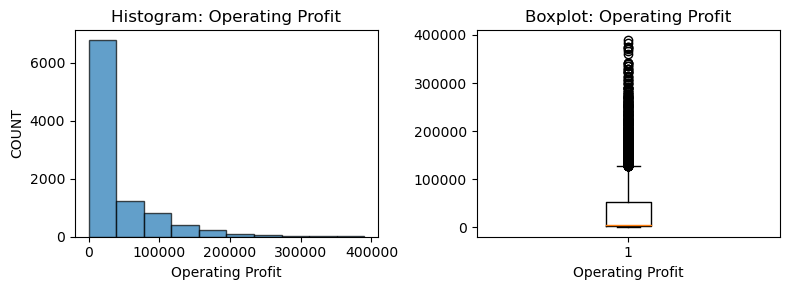

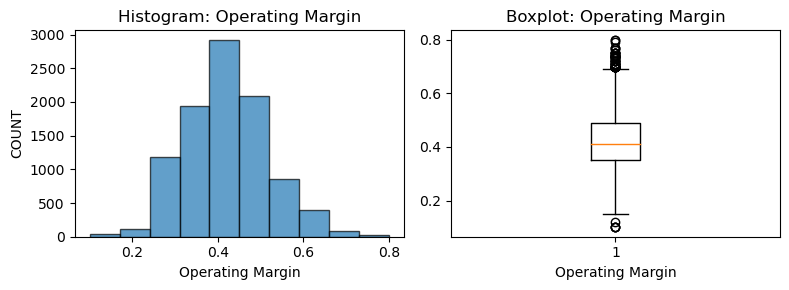

In [11]:
# Apply the PDB function to selected columns.
columns = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']

for column in columns:
    PDB(column)

*"Price per Unit"* and *"Operating Margin"* have relatively normal distribution, but both have many outliers toward the higher end. *"Units Sold"*, *"Total Sales"* and *"Operating Margin"* are skewed with a long tale to the right.  That means while the average order size, total sales & operating profit per order are relatively low, there are a lot of outliers (i.e. large-sized orders & orders with high sales volume and operating profit).

### 3.2.3 Segmentation

While the ultimate goal of this project is sales forecast, we need to take some time to understand the segmentation of Adidas' sales data.  We want to be able to answer questions like those listed below.

- Who is Adidas' biggest retailer? Who is the smallest?
- Which product line sells the best, and which the worst?
- Does region play a role in total sales and profitability for Adidas merchandise?  If yes, how?
- Is any particular sales method better than others in terms of generating more sales volumes and/or being more profitable?
- Profit is the most important piece of the bottom line.  Which segment, whether by region, by retailer, by product line, or by sales method, brings Adidas the utmost margin/profit?

With all these questions in mind, let's start our journey to explore the Adidas sales data.

#### 3.2.3.1 Regional Analysis

In [12]:
# Group total sales & profit by region.
sales_profit_by_region = pd.DataFrame()
sales_profit_by_region = df.groupby('Region').agg({'Total Sales': 'sum', 'Operating Profit': 'sum'}).reset_index()
sales_profit_by_region['% of Sales'] = round(sales_profit_by_region['Total Sales'] / total_sales, 2)
sales_profit_by_region['% of Profit'] = round(sales_profit_by_region['Operating Profit'] / total_op_profit, 2)
sales_profit_by_region['Operating Margin'] = round(sales_profit_by_region['Operating Profit'])/sales_profit_by_region['Total Sales']
sales_profit_by_region = sales_profit_by_region.sort_values('% of Profit', ascending=False).reset_index(drop=True)
sales_profit_by_region

,Region,Total Sales,Operating Profit,% of Sales,% of Profit,Operating Margin
0,West,269943182.0,89609406.55,0.30,0.27,0.331957
1,Northeast,186324067.0,68020587.65,0.21,0.20,0.365066
2,South,144663181.0,61138004.07,0.16,0.18,0.422623
3,Southeast,163171236.0,60555416.70,0.18,0.18,0.371116
4,Midwest,135800459.0,52811346.48,0.15,0.16,0.388889


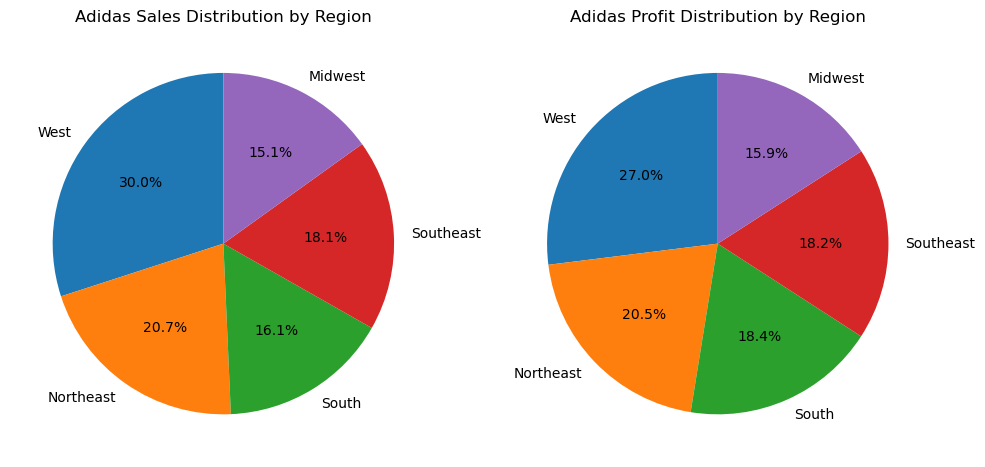

In [13]:
# Set the labels and values for the pie chart
labels = sales_profit_by_region['Region']
sales_data = sales_profit_by_region['Total Sales']
profit_data = sales_profit_by_region['Operating Profit']

# Plot the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(sales_data, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Adidas Sales Distribution by Region')

ax2.pie(profit_data, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Adidas Profit Distribution by Region')

# Adjust the spacing between the subplots
fig.tight_layout()
plt.show()

Obviously the West Region has the highest sales volume of 30%, followed by the Northeast Region of 20.7%.  Despite the high sales volume, the operating margins in West Region and Northeast Region are the lowest and 2nd lowest.  This is an interesting observation.  Are the higher sales volume in West and Northeast obtained at the expense of lower margin and less profitability?  More investigation is needed.  Another interesting observation is that while the South Region doesn't have an impressive sales record, the profit margin for that region is the highest (42%) out of all regions.  That means the more Adidas sells in the South, the more profit it will get.  Is that a strategic direction Adidas should proceed? More investigation is needed.

Next, let's take a closer look at the sales & profit ranking of the states.

In [14]:
# Group total sales & profit by state.
sales_profit_by_state = pd.DataFrame()
sales_profit_by_state = df.groupby('State').agg({'Total Sales': 'sum', 'Operating Profit': 'sum'}).reset_index()
sales_profit_by_state['% of Sales'] = round(sales_profit_by_state['Total Sales'] / total_sales, 3)
sales_profit_by_state['% of Profit'] = round(sales_profit_by_state['Operating Profit'] / total_op_profit, 3)
sales_profit_by_state['Operating Margin'] = round(sales_profit_by_state['Operating Profit'])/sales_profit_by_state['Total Sales']
sales_profit_by_state = sales_profit_by_state.sort_values('Operating Profit', ascending=False).reset_index(drop=True)
sales_profit_by_state.head(10)

,State,Total Sales,Operating Profit,% of Sales,% of Profit,Operating Margin
0,New York,64229039.0,23329824.07,0.071,0.070,0.363229
1,Florida,59283714.0,20926206.92,0.066,0.063,0.352984
2,California,60174133.0,19301170.40,0.067,0.058,0.320755
3,Texas,46359746.0,18688204.35,0.052,0.056,0.403113
4,South Carolina,29285637.0,11324236.39,0.033,0.034,0.386682
5,North Carolina,23956531.0,9756422.87,0.027,0.029,0.407255
6,Louisiana,23750781.0,9417233.49,0.026,0.028,0.396502
7,Alabama,17633424.0,9147581.39,0.020,0.028,0.518764
8,Tennessee,18067440.0,8493660.06,0.020,0.026,0.470109
9,Michigan,18625433.0,8135894.02,0.021,0.024,0.436816


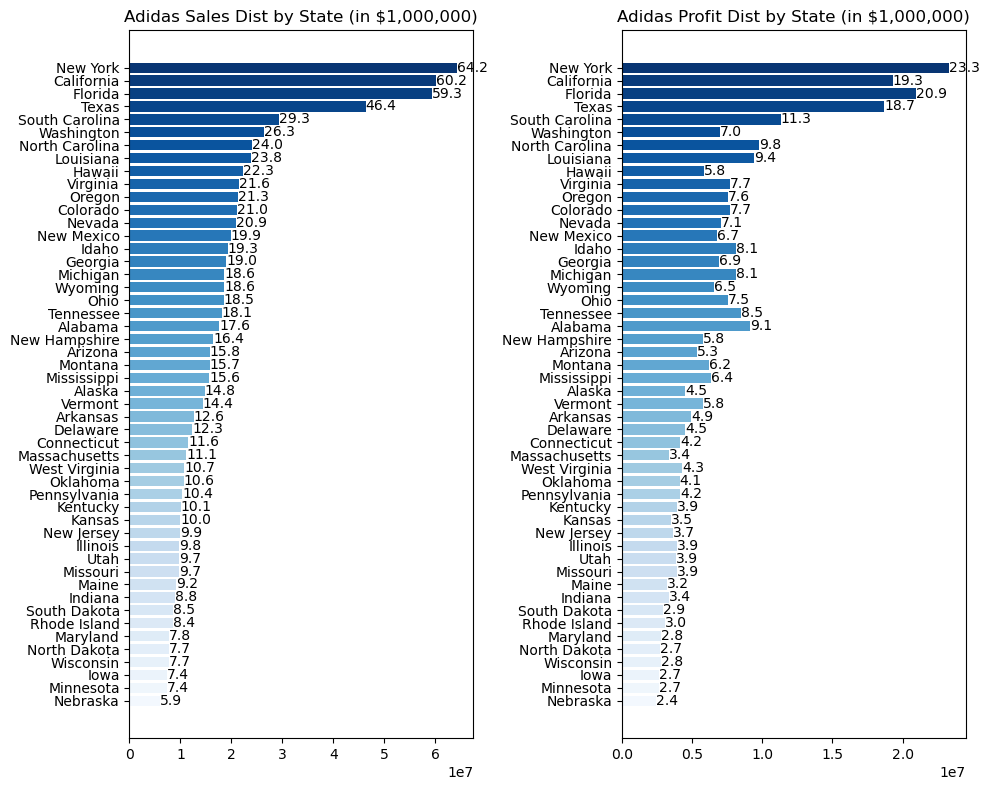

In [15]:
# Set the labels and values for the pie chart
sales_profit_by_state = sales_profit_by_state.sort_values('Total Sales').reset_index(drop=True)
labels = sales_profit_by_state['State']
sales_data = sales_profit_by_state['Total Sales']
profit_data = sales_profit_by_state['Operating Profit']

# Plot the bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
colors = sns.color_palette('Blues', len(labels))

ax1.barh(labels, sales_data, color=colors)
ax1.set_title('Adidas Sales Dist by State (in $1,000,000)')

ax2.barh(labels, profit_data, color=colors, tick_label=labels, align='center')
ax2.set_title('Adidas Profit Dist by State (in $1,000,000)')

for i, v in enumerate(sales_data):
    ax1.text(v + 10, i, str(round(v/1000000, 1)), va='center')

for i, v in enumerate(profit_data):
    ax2.text(v + 10, i, str(round(v/1000000, 1)), va='center')

# Adjust the spacing between the subplots
fig.tight_layout()
plt.show()

New York, California, Florida, Texas and South Carolina are the top 5 states in terms of both sales and operating profit.  However, the # 6 top state in sales, Washington, has a significantly low operating profit of around \\$7M.  Another state with similar situation is Hawaii, with \\$22.3M sales but only \\$5.8M operating profit.  On the other hand, we have states with not-so-impressive sales results but very good profit, such as Alabama with $17.6M sales and \\$9.1M operating profit, and Tennessee with \\$18.1M sales & \\$8.5M operating profit.

#### 3.2.3.2 Retailer Segmentation

In [16]:
retailers = df[['Retailer', 'Retailer ID']].drop_duplicates()
retailers

,Retailer,Retailer ID
0,Foot Locker,1185732
46,Walmart,1185732
68,Sports Direct,1197831
90,Walmart,1197831
140,West Gear,1128299
212,Kohl's,1189833
725,West Gear,1185732
766,Sports Direct,1185732
1148,Amazon,1185732
1287,Foot Locker,1128299


While it makes sense for the same retailer to be assigned different IDs due to different geographic store locations, it's hard to understand why different retailers will be assigned the same ID as illustrated in the above table.  Without the business context to figure out why, we will have to make the assumption that there may be data entry error in the *Retailer ID* column.  With this assumption, we'll use the *Retailer* name to group the sales and profit values, and use the *Retailer* column as a feature in our sales forecast model.  

In [17]:
# Group total sales by retailer.
sales_profit_by_retailer = pd.DataFrame()
sales_profit_by_retailer = df.groupby('Retailer').agg({'Retailer ID': 'first', 'Total Sales': 'sum', 'Operating Profit': 'sum'}).reset_index()
sales_profit_by_retailer['% of Sales'] = round(sales_profit_by_retailer['Total Sales'] / total_sales, 2)
sales_profit_by_retailer['% of Profit'] = round(sales_profit_by_retailer['Operating Profit'] / total_op_profit, 2)
sales_profit_by_retailer['Operating Margin'] = round(sales_profit_by_retailer['Operating Profit'])/sales_profit_by_retailer['Total Sales']
sales_profit_by_retailer = sales_profit_by_retailer.sort_values('% of Profit', ascending=False).reset_index(drop=True)
sales_profit_by_retailer

,Retailer,Retailer ID,Total Sales,Operating Profit,% of Sales,% of Profit,Operating Margin
0,West Gear,1128299,242964333.0,85667873.18,0.27,0.26,0.352594
1,Foot Locker,1185732,220094720.0,80722124.81,0.24,0.24,0.366761
2,Sports Direct,1197831,182470997.0,74332954.96,0.20,0.22,0.407369
3,Kohl's,1189833,102114753.0,36811252.58,0.11,0.11,0.360489
4,Amazon,1185732,77698912.0,28818503.31,0.09,0.09,0.370900
5,Walmart,1185732,74558410.0,25782052.61,0.08,0.08,0.345797


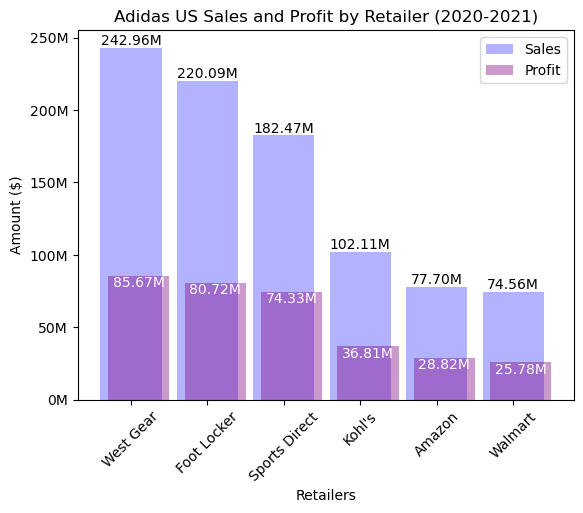

In [18]:
# Create an array of indices for x-axis tick labels
x = np.arange(len(sales_profit_by_retailer['Retailer']))

# Create the stacked bar chart
sales_bars = plt.bar(x, sales_profit_by_retailer['Total Sales'], label='Sales', alpha=0.3, color='blue')
profit_bars = plt.bar(x+0.1, sales_profit_by_retailer['Operating Profit'], label='Profit', alpha=0.4, color='purple')
plt.xticks(x, sales_profit_by_retailer['Retailer'])

# Add values on top of the bars
for bar in sales_bars:
    height = bar.get_height()
    value = height / 1000000  # Convert value to million dollars
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}M', ha='center', va='bottom')
for bar in profit_bars:
    height = bar.get_height()
    value = height / 1000000  # Convert value to million dollars
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}M', ha='center', va='top', color='w')

plt.xlabel('Retailers')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000):,}M'))
plt.title('Adidas US Sales and Profit by Retailer (2020-2021)')
plt.legend()

plt.show()

West Gear is Adidas' No. 1 retailer in terms of sales volume and operating profit. This retailer chain alone counts for over 26% of Adidas' overall sales and operating profit. The 2nd place goes to Foot Locker, who counts for 24% of Adidas' total sales and operating profit. While Sports Direct ranks only 3rd place for total sales, it has the highest operating margin of nearly 41% out of all 6 retailers. Walmart is the smallest retailer, counting for only 8% of Adidas' sales and profit, with the lowest profit margin of 34%. Further analysis is needed to determine whether it's strategically smart for Adidas to keep Walmart as a retailer or drop it and put the company's limited resources to other areas that may generate better results.

#### 3.2.3.3 Product Segmentation

In [19]:
# Group total sales by region.
sales_profit_by_product = pd.DataFrame()
sales_profit_by_product = df.groupby('Product').agg({'Total Sales': 'sum', 'Operating Profit': 'sum'}).reset_index()
sales_profit_by_product['% of Sales'] = round(sales_profit_by_product['Total Sales'] / total_sales, 2)
sales_profit_by_product['% of Profit'] = round(sales_profit_by_product['Operating Profit'] / total_op_profit, 2)
sales_profit_by_product['Operating Margin'] = round(sales_profit_by_product['Operating Profit'])/sales_profit_by_product['Total Sales']
sales_profit_by_product=sales_profit_by_product.sort_values('% of Profit', ascending=False).reset_index(drop=True)
sales_profit_by_product

,Product,Total Sales,Operating Profit,% of Sales,% of Profit,Operating Margin
0,Men's Street Footwear,208826244.0,82802260.62,0.23,0.25,0.396513
1,Women's Apparel,179038860.0,68650970.56,0.20,0.21,0.383442
2,Men's Athletic Footwear,153673680.0,51846888.19,0.17,0.16,0.337383
3,Women's Street Footwear,128002813.0,45095826.81,0.14,0.14,0.352303
4,Men's Apparel,123728632.0,44763030.33,0.14,0.13,0.361784
5,Women's Athletic Footwear,106631896.0,38975784.94,0.12,0.12,0.365517


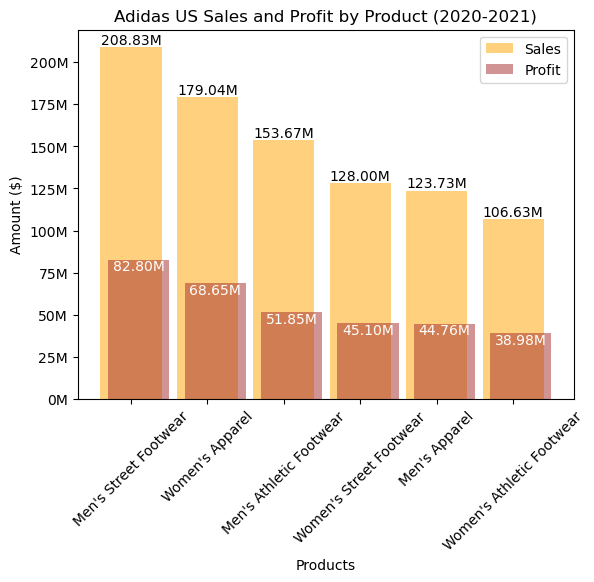

In [20]:
# Create an array of indices for x-axis tick labels
x = np.arange(len(sales_profit_by_product['Product']))

# Create the stacked bar chart
sales_bars = plt.bar(x, sales_profit_by_product['Total Sales'], label='Sales', alpha=0.5, color='orange')
profit_bars = plt.bar(x+0.1, sales_profit_by_product['Operating Profit'], label='Profit', alpha=0.5, color='brown')
plt.xticks(x, sales_profit_by_product['Product'])

# Add values on top of the bars
for bar in sales_bars:
    height = bar.get_height()
    value = height / 1000000  # Convert value to million dollars
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}M', ha='center', va='bottom')
for bar in profit_bars:
    height = bar.get_height()
    value = height / 1000000  # Convert value to million dollars
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}M', ha='center', va='top', color='w')

plt.xlabel('Products')
plt.xticks(rotation=45)
plt.ylabel('Amount ($)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000):,}M'))
plt.title('Adidas US Sales and Profit by Product (2020-2021)')
plt.legend()

plt.show()

Men's Street Footwear is Adidas' best selling product line with over \\$208M dollar in sales volume and \\$83M dollar operating profit.  Women's Apparel ranks No.2, with \\$179M dollar in sales and \\$69M dollar in operating profit.  Interestingly, these two top selling products also have the highest operating margin of 40% and 38% respectively.  On the other hand, Women's Athletic Footwear is the worst selling product line for Adidas, with \\$107M dollar in sales volume and \\$39M dollar in operating profit.  However, even ranking the lowest, Women's Athletic Footwear still has a decent operating margin of 36.6% and counts for 12% of Adidas' total sales and profitability.

#### 3.2.3.4 Sales Method Segmentation

In [21]:
# Group total sales & profit by region.
sales_profit_by_salesmethod = pd.DataFrame()
sales_profit_by_salesmethod = df.groupby('Sales Method').agg({'Total Sales': 'sum', 'Operating Profit': 'sum'}).reset_index()
sales_profit_by_salesmethod['% of Sales'] = round(sales_profit_by_salesmethod['Total Sales'] / total_sales, 2)
sales_profit_by_salesmethod['% of Profit'] = round(sales_profit_by_salesmethod['Operating Profit'] / total_op_profit, 2)
sales_profit_by_salesmethod['Operating Margin'] = round(sales_profit_by_salesmethod['Operating Profit'])/sales_profit_by_salesmethod['Total Sales']
sales_profit_by_salesmethod = sales_profit_by_salesmethod.sort_values('% of Profit', ascending=False).reset_index(drop=True)
sales_profit_by_salesmethod

,Sales Method,Total Sales,Operating Profit,% of Sales,% of Profit,Operating Margin
0,In-store,356643750.0,1.275913e+08,0.40,0.38,0.357756
1,Outlet,295585493.0,1.079883e+08,0.33,0.33,0.365337
2,Online,247672882.0,9.655518e+07,0.28,0.29,0.389850


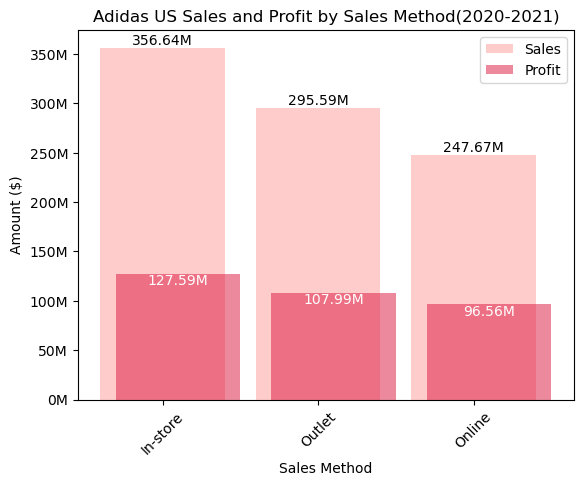

In [22]:
# Create an array of indices for x-axis tick labels
x = np.arange(len(sales_profit_by_salesmethod['Sales Method']))

# Create the stacked bar chart
sales_bars = plt.bar(x, sales_profit_by_salesmethod['Total Sales'], label='Sales', alpha=0.2, color='red')
profit_bars = plt.bar(x+0.1, sales_profit_by_salesmethod['Operating Profit'], label='Profit', alpha=0.5, color='crimson')
plt.xticks(x, sales_profit_by_salesmethod['Sales Method'])

# Add values on top of the bars
for bar in sales_bars:
    height = bar.get_height()
    value = height / 1000000  # Convert value to million dollars
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}M', ha='center', va='bottom')
for bar in profit_bars:
    height = bar.get_height()
    value = height / 1000000  # Convert value to million dollars
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}M', ha='center', va='top', color='w')

plt.xlabel('Sales Method')
plt.xticks(rotation=45)
plt.ylabel('Amount ($)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000):,}M'))
plt.title('Adidas US Sales and Profit by Sales Method(2020-2021)')
plt.legend()

plt.show()

While stores sell the most Adidas merchandise, accounting for 40% of the company's total sales, their operating margin is the lowest at 26%.  On the other hand, while online shopping sells the least (28%) quantity wise, its profitability is the highest with an operating margin of 39%.  Maybe Adidas should launch more online sales promotions to stimulate consumers to order online, which will bring better profit to the company. 

### 3.2.4 Data Correlation

Finally, let's take a look at the correlation between numeric features.  Profit is the most critical element that directly impacts a company's bottom line.  While many companies are after higher sales volumes, high sales volumes with low profit isn't gonna benefit the company much.  It's the high sales volume combined with high operating profit that's most attractive to companies.  In some cases, medium or low sales volume with higher operating profit might also win companies' favor.  With this in mind, let's take a look at the heatmap.  

<Axes: >

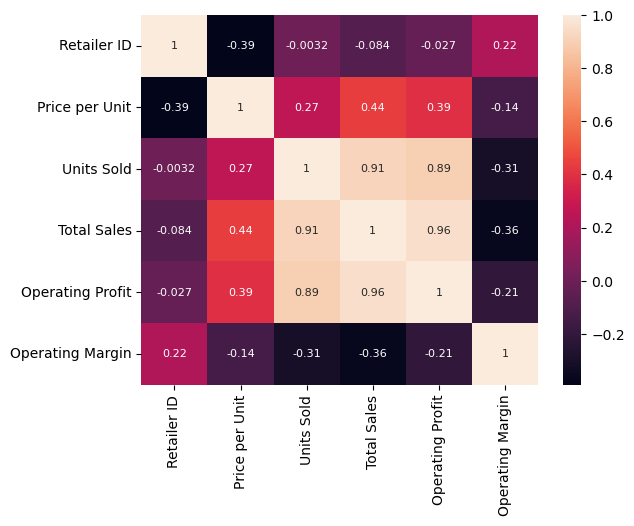

In [23]:
sns.heatmap(df.corr(numeric_only=True), annot=True, annot_kws={'size': 8})

Operating profit is a direct contributor to a company's bottom line.  Based upon the above heat chart, we can see that Price per Unit, Units Sold and Total Sales are all in positive correlation with Operating Profit. The correlation between Operating Profit and Total Sales is very high at 0.96.  The correlation with Units Sold is also high at 0.89.  Interestingly, Operating Margin and Operating Profit are negatively correlated, meaning as the operating profit gets higher, the operating margin tends to get lower. As an important tool to measure Adidas' operation performance efficiency, operating margin is an element that can't be ignored. Unfortunately, most numeric features in our data, including Price per Unit, Units Sold, Total Sales and Operating Profit, all have negative correlation with Operating Margin.  Whether Adidas should focus on getting higher Operating Profit in the short term by increasing Price per Unit or focus on improving its Operating Margin to achieve better operating performance in the short term and ultimate success in the long run, remains a critical question to be answered.

At this point, our data is ready to enter the next phase of our project for pre-processing and modeling.  Let's save them for now.

In [24]:
# Save the data for next phase of the project.
sales_by_time.to_csv("sales_by_time.csv")
sales_by_month.to_csv("sales_by_month.csv")
sales_profit_by_retailer.to_csv("sales_profit_by_retailer.csv")
sales_profit_by_product.to_csv("sales_profit_by_product.csv")
sales_profit_by_salesmethod.to_csv("sales_profit_by_salesmethod.csv")